If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression since linear regression presumes that the data is linear.
Let's learn about non linear regressions and apply an example in python. In this notebook, we fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Although linear regression can do a great job at modeling some datasets, it cannot be used for all datasets. First recall how linear regression, models a dataset. It models the linear relationship between a dependent variable y and the independent variables x. It has a simple equation, of degree 1, for example y = $2x$ + 3.


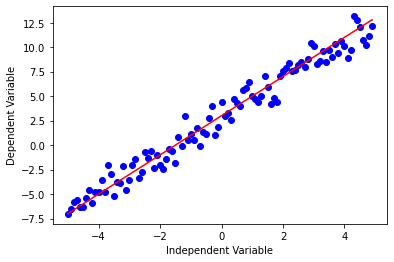

In [5]:
x = np.arange(-5.0 ,5.0 ,0.1)

y = (2 *x ) +3 

y_noise = np.random.normal(size =x.size)
y_data = y + y_noise
plt.plot(x , y_data ,'bo') # plot x and y using blue circle markers
plt.plot(x , y ,'-r' )
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Non-linear regression is a method to model the non-linear relationship between the independent variables $x$ and the dependent variable $y$. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$).  For example:

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example: $$ y = \log(x)$$

We can have a function that's even more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$


let's take alook at cubic function 

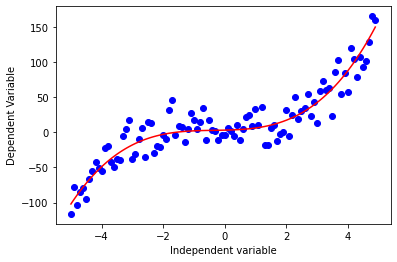

In [10]:
x = np.arange(-5.0,5.0,0.1)

y = 1*(x**3) + 1*(x**2) + x + 3
y_noise = 20 * np.random.normal(size = x.size)

y_data = y +y_noise

plt.plot(x ,y_data ,'bo')
plt.plot(x ,y ,'-r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent Variable')
plt.show()

### Quadratic


$$ Y = X^2 $$


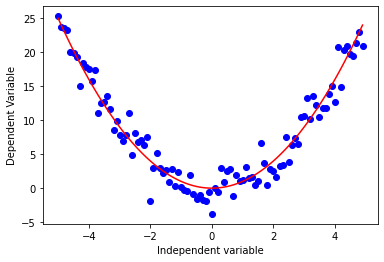

In [14]:
x =np.arange(-5.0 ,5.0 ,0.1)
y = np.power(x,2)
y_noise =  2* np.random.normal(size =x.size)
y_data = y + y_noise
plt.plot(x ,y_data ,'bo')
plt.plot(x ,y ,'-r')
plt.xlabel('Independent variable')
plt.ylabel('Dependent Variable')
plt.show()

### Exponential


An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.


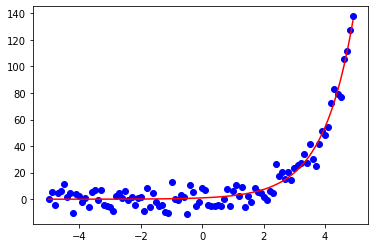

In [20]:
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)
noise = 7 * np.random.normal(size =x.size)
y_data = y + noise
plt.plot(x ,y_data , 'bo')
plt.plot(x, y ,'-r')
plt.show()

### Logarithmic

The response $y$ is a results of applying the logarithmic map from the input $x$ to the output $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be a polynomial representation of the $x$ values. In general form it would be written as\
\begin{equation}
y = \log(X)
\end{equation}


C:\Users\dell\AppData\Local\Temp/ipykernel_1168/278219788.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


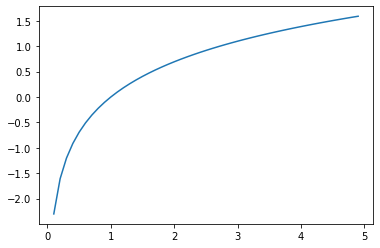

In [24]:
x = np.arange(-5.0,5.0,0.1)
y = np.log(x)
plt.plot(x ,y)
plt.show()

### Sigmoidal/Logistic


$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


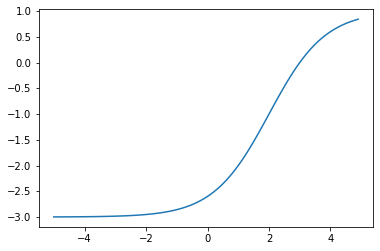

In [25]:
x = np.arange(-5 ,5 ,0.1)

y = 1 - 4 /(1 + np.power(3 , x-2))

plt.plot(x,y)

# Non-Linear Regression example

For an example, we're going to try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. We download a dataset with two columns, the first, a year between 1960 and 2014, the second, China's corresponding annual gross domestic income in US dollars for that year.

In [49]:
import pandas as pd 
df =pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Plotting the Dataset

This is what the datapoints look like. It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.


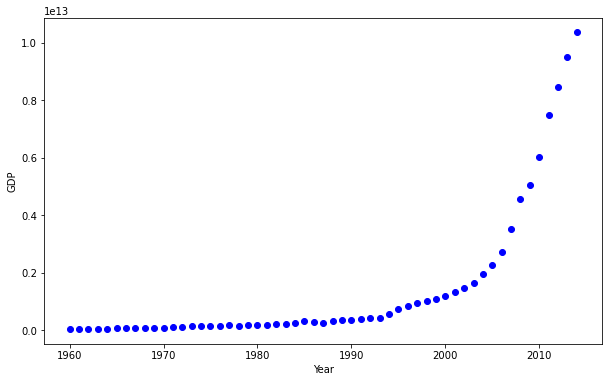

In [50]:
plt.figure(figsize=(10,6))
x_data , y_data = (df['Year'].values , df['Value'].values)
plt.plot(x_data,y_data, 'bo')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

### Choosing a model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:


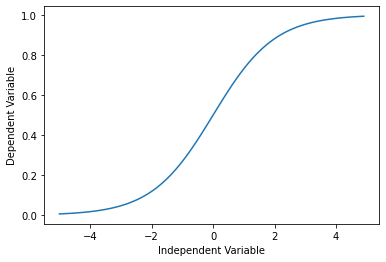

In [51]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters.


In [52]:
def sigmoid (x ,b1 ,b2):
    y = 1 / (1.0 + np.exp(-b1 * (x-b2)))
    return y

Lets look at a sample sigmoid line that might fit with the data:


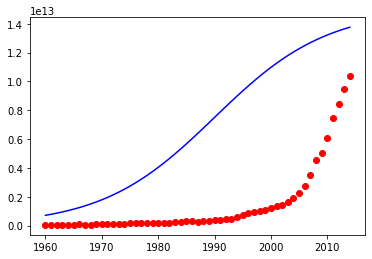

In [53]:
b1=0.1
b2=1990
y_pred =sigmoid(x_data ,b1 ,b2)
plt.plot(x_data ,y_pred*15000000000000.,'-b')
plt.plot(x_data, y_data, 'ro') # red points

Our task here is to find the best parameters for our model. Lets first normalize our x and y:


In [55]:
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


In [63]:
from scipy.optimize import curve_fit
popt , pcov = curve_fit(sigmoid ,xdata ,ydata)
print ('b1 = %f   b2= %f' % (popt[0] ,popt[1]))

b1 = 690.451712   b2= 0.997207


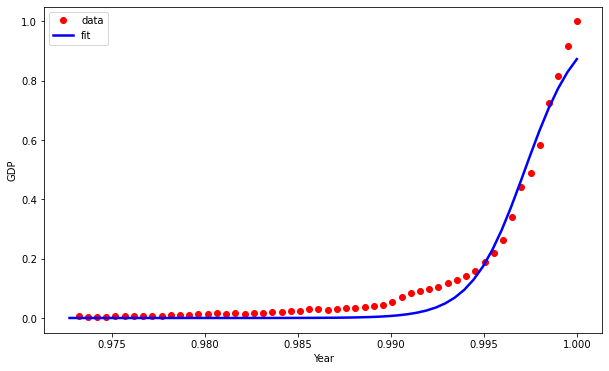

In [68]:
x= np.linspace(1960 , 2015 ,55)
x = x/max(x)

y = sigmoid(x ,popt[0],popt[1])
plt.figure(figsize=(10,6))
plt.plot(xdata ,ydata ,'ro' ,label ='data')
plt.plot(x ,y ,'-b' ,linewidth =2.5,label ='fit')
plt.legend(loc ='best')
plt.xlabel('Year')
plt.ylabel("GDP")
plt.show()

 what is the accuracy of our model?


In [70]:
msk = np.random.rand(len(df)) < 0.8
x_train = xdata[msk]
x_test = xdata[~msk]
y_train = ydata[msk]
y_test = ydata[~msk]

popt ,cov =curve_fit(sigmoid , x_train ,y_train)
y_hat = sigmoid(x_test ,popt[0] ,popt[1])

print('Mean absoulte error %.2f' % np.mean(np.absolute(y_hat - y_test)))

print('Mean square error %.2f' % np.mean((y_hat - y_test)**2))

from sklearn.metrics import r2_score
print('R2 = %.2f' % r2_score(y_test ,y_hat))


Mean absoulte error 0.03
Mean square error 0.00
R2 = 0.75
